**WELCOME!**

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

**Determines**

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

<a id="0"><font color='red'>**TASKS**</font></a>

 **1. Exploratory Data Analysis (EDA)**
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

 **2. Data Preprocessing**
- Scale (if needed)
- Separete the data frame for evaluation purposes

 **3. Multi-class Classification**
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [780]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew, kurtosis

# !pip install skimpy
from skimpy import clean_columns

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
pd.set_option('display.float_format', lambda x: f'{x:.4f}')
# pd.set_option('display.float_format', lambda x: '%.6f'%x)
# pd.options.display.float_format = '{:.3f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [781]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid", {'axes.grid' : False})

params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [782]:
df_male_origin =pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding="unicode_escape")
df_male = df_male_origin.copy()
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [783]:
df_female_origin =pd.read_csv("ANSUR II FEMALE Public.csv", encoding="unicode_escape")
df_female = df_female_origin.copy()
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [784]:
df_male.shape, df_female.shape

((4082, 108), (1986, 108))

### Checking the summary information of df

In [785]:
df_female.info(),print("\n"),print(50*"*"),print("\n"), df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


**************************************************


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


(None, None, None, None, None)

In [786]:
## verbose :  Whether to print the full summary.
df_male.info(verbose=True)
df_female.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

## Explore Data

### Checking features and concatenating DataFrames

In [787]:
# Finding the columns with different names
(df_female.columns!=df_male.columns).sum()

1

In [788]:
df_female.columns[np.where(df_female.columns!=df_male.columns)], df_male.columns[np.where(df_female.columns!=df_male.columns)]

(Index(['SubjectId'], dtype='object'), Index(['subjectid'], dtype='object'))

In [789]:
# Fixing the different column names
df_female.rename(columns={'SubjectId':'subjectid'}, inplace=True)

In [790]:
df = pd.concat([df_male,df_female], ignore_index=True, axis=0)

In [791]:
df.shape

(6068, 108)

In [792]:
# # Function to clean column names
# from skimpy import clean_columns
# df = clean_columns(df)
## But we don't need to change the names of columns, fro now.

In [793]:
df.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

### Checking the missing values

In [794]:
df.isnull().sum().any()

True

In [795]:
df.isnull().mean().tail(10)

Branch                  0.0000
PrimaryMOS              0.0000
SubjectsBirthLocation   0.0000
SubjectNumericRace      0.0000
Ethnicity               0.7658
DODRace                 0.0000
Age                     0.0000
Heightin                0.0000
Weightlbs               0.0000
WritingPreference       0.0000
dtype: float64

### Checking if there are some dublicate rows or not

In [796]:
df.duplicated().sum()

0

### Checking the statistical values of features

In [797]:
# Descriptive statistics for numerical features
df.describe(exclude="O").T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0000,20757.1984,13159.3909,10027.0000,14841.7500,20063.5000,27234.5000,920103.0000
abdominalextensiondepthsitting,6068.0000,246.4687,37.4001,155.0000,219.0000,242.0000,271.0000,451.0000
acromialheight,6068.0000,1406.1613,79.0910,1115.0000,1350.0000,1410.0000,1462.0000,1683.0000
acromionradialelength,6068.0000,327.3744,20.7200,249.0000,313.0000,328.0000,341.2500,393.0000
anklecircumference,6068.0000,224.8914,16.0518,156.0000,214.0000,225.0000,235.0000,293.0000
axillaheight,6068.0000,1299.6088,72.0223,1038.0000,1249.0000,1302.0000,1349.0000,1553.0000
balloffootcircumference,6068.0000,244.1926,16.8450,186.0000,232.0000,245.0000,256.0000,306.0000
balloffootlength,6068.0000,194.7546,13.5164,151.0000,185.0000,195.0000,204.0000,245.0000
biacromialbreadth,6068.0000,399.2042,30.2369,283.0000,376.0000,404.0000,421.0000,489.0000
bicepscircumferenceflexed,6068.0000,340.9342,41.5199,216.0000,311.0000,341.0000,370.0000,490.0000


In [798]:
df.describe().T[df.describe().T['std']>df.describe().T['mean']]

,count,mean,std,min,25%,50%,75%,max
SubjectNumericRace,6068.0000,17.5153,550.9499,1.0000,1.0000,1.0000,2.0000,42351.0000


> It should be checked whether this feature contains outlier values.

In [799]:
df.describe(include="O").T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


> Some features contain many unique values. We will drop these features as it is very difficult for the model to learn from these features and will affect the performance of the model.

In [800]:
df[df.SubjectNumericRace == df.DODRace][["SubjectNumericRace","DODRace"]].value_counts()

SubjectNumericRace  DODRace
1                   1          3554
2                   2          1025
3                   3           522
4                   4           108
6                   6            37
5                   5            16
dtype: int64

In [801]:
df[df['SubjectNumericRace']!=df['DODRace']].shape

(806, 108)

In [802]:
# to find how many unique values object features have
for col in df.select_dtypes("object"):
  print(f"{col} has {df[col].nunique()} unique value")
    

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
Ethnicity has 209 unique value
WritingPreference has 3 unique value


In [803]:
# drop columns repeated and unnecessary column , 'Installation' and Categorical columns high unique value

df.drop(columns=['Ethnicity',"Date","Installation", "subjectid","Weightlbs","Heightin","SubjectNumericRace","PrimaryMOS"], inplace=True)

In [804]:
df.shape

(6068, 100)

 **1 = White, 2 = Black, 3 = Hispanic, 4 = Asian,
5 = Native American, 6 = Pacific Islander, 8 = Other**

In [805]:
df["DODRace"].value_counts().sort_index()

1    3792
2    1298
3     679
4     188
5      49
6      59
8       3
Name: DODRace, dtype: int64

In [806]:
# dropping DODRace whose value counts are less than 500

(df.DODRace.value_counts() < 500)

1    False
2    False
3    False
4     True
6     True
5     True
8     True
Name: DODRace, dtype: bool

In [807]:

df.drop(index=df.loc[df.DODRace.isin([4,5,6,8])].index, inplace=True)

In [808]:
df.reset_index(drop=True, inplace=True)
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,Regular Army,Combat Arms,North Dakota,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,Regular Army,Combat Support,New York,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,Regular Army,Combat Support,New York,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Regular Army,Combat Service Support,Wisconsin,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,Regular Army,Combat Service Support,North Carolina,2,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,

In [809]:
df.shape

(5769, 100)

In [810]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace
Army National Guard  1         0.7115
                     2         0.1914
                     3         0.0970
Army Reserve         1         0.5507
                     2         0.2512
                     3         0.1981
Regular Army         1         0.6169
                     2         0.2528
                     3         0.1303
Name: DODRace, dtype: float64

In [811]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace
Army National Guard  Combat Arms             1         0.8028
                                             2         0.1018
                                             3         0.0954
                     Combat Service Support  1         0.6689
                                             2         0.2276
                                             3         0.1036
                     Combat Support          1         0.6848
                                             2         0.2348
                                             3         0.0804
Army Reserve         Combat Arms             1         0.8333
                                             3         0.1667
                     Combat Service Support  1         0.6029
                                             3         0.2206
                                             2         0.1765
                     Combat Support          2         0.4308
                 

<AxesSubplot:ylabel='Component,Branch,DODRace'>

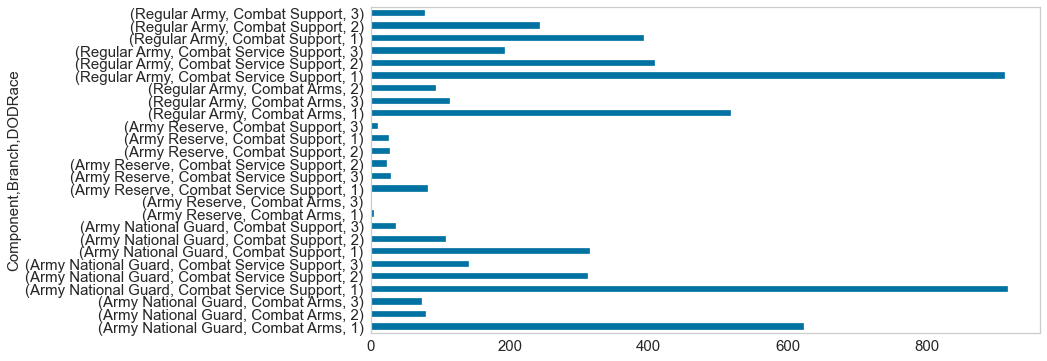

In [812]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts().plot(kind="barh")

In [813]:
df.drop(columns=["Component", "Branch"], inplace=True)

In [814]:
df.shape

(5769, 98)

In [815]:
df_last = df.copy()

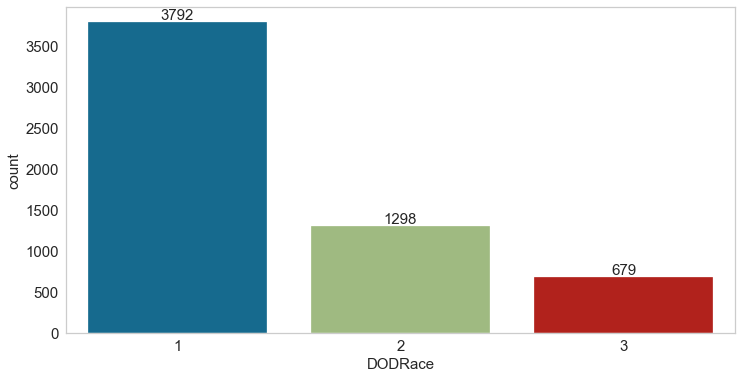

In [816]:
ax = sns.countplot(df["DODRace"])
ax.bar_label(ax.containers[0])
plt.show()

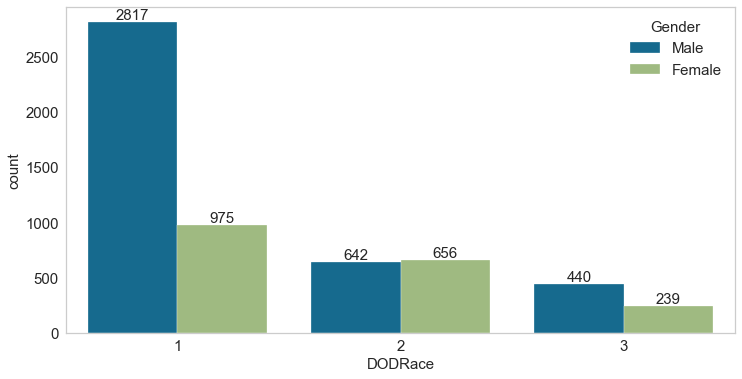

In [817]:
ax = sns.countplot(x="DODRace", hue="Gender", data = df)
for p in ax.containers:
    ax.bar_label(p)

In [818]:
df.corr()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Age
abdominalextensiondepthsitting,1.0000,0.3519,0.3129,0.5189,0.2808,0.4567,0.3326,0.4176,0.6911,0.5059,0.7243,0.3662,0.5309,0.6263,0.5197,0.7395,0.8408,0.2459,0.4764,0.3237,0.6585,0.3374,0.6279,0.8258,0.7784,0.2962,0.1890,0.4633,0.1999,0.2422,0.4035,0.1398,0.2641,0.2797,0.4391,0.3452,0.3459,0.6283,0.7289,0.3061,0.4153,0.4193,0.4573,0.3013,0.3617,0.3633,0.3293,0.5025,0.4372,0.5952,0.5547,0.2564,0.2588,0.5994,0.5422,0.2753,0.3485,0.2208,0.3484,0.6744,0.2943,0.6569,0.6272,0.3211,0.3105,0.1495,0.2802,0.6379,0.2872,0.1877,0.2743,0.4226,0.2769,0.3182,0.3080,0.3527,0.2935,0.7300,0.7247,0.3894,0.2607,0.1864,0.2310,0.7285,0.5720,0.8590,0.9396,0.9587,0.5795,0.1471,0.8252,0.5469,0.3832,-0.0319,0.3856
acromialheight,0.3519,1.0000,0.8683,0.5047,0.9871,0.6940,0.7978,0.7333,0.5227,0.4016,0.6285,0.7050,0.5702,0.5839,0.5067,0.2831,0.3418,0.8670,0.8114,0.7467,0.4094,0.9840,0.5426,0.5307,0.2808,0.9593,0.8990,0.3420,0.4107,0.3588,0.4397,0.2781,0.2925,0.8136,0.6720,0.8268,0.8465,0.6355,0.5724,0.8625,0.8940,0.7085,0.7170,0.7529,0.4066,0.4318,0.5484,0.7974,0.4479,0.2078,0.1002,0.9322,0.3377,0.5264,0.5920,0.8959,0.9318,0.8565,0.6778,0.3273,0.5399,0.6279,0.6518,0.8674,0.7092,0.8934,0.8218,0.6898,0.8890,0.5422,0.8215,0.8724,0.8798,0.8840,0.9799,0.9847,0.9450,0.2772,0.4452,0.8037,0.8909,0.3275,0.8837,0.7337,0.7279,0.4386,0.4052,0.3623,0.6070,0.9310,0.6778,0.7336,0.9213,-0.2174,0.0830
acromionradialelength,0.3129,0.8683,1.0000,0.4161,0.8574,0.6042,0.7260,0.6674,0.4525,0.3435,0.5599,0.6148,0.5196,0.5145,0.4561,0.2470,0.2920,0.8141,0.7754,0.7352,0.3549,0.8658,0.4664,0.4703,0.2659,0.8418,0.8505,0.2472,0.3066,0.3110,0.3705,0.2338,-0.0049,0.6392,0.5874,0.7489,0.8181,0.5569,0.5010,0.8363,0.8202,0.6239,0.6320,0.7198,0.3543,0.3897,0.4831,0.7093,0.4389,0.1823,0.0845,0.8585,0.3400,0.4695,0.5406,0.8311,0.8611,0.8122,0.5545,0.2844,0.4750,0.5463,0.5687,0.7910,0.6651,0.8288,0.8000,0.6211,0.9675,0.5137,0.6466,0.8715,0.9398,0.8940,0.8556,0.8621,0.8493,0.2383,0.3816,0.8008,0.8250,0.2923,0.8321,0.5818,0.6096,0.3736,0.3549,0.3280,0.4809,0.8459,0.5957,0.6425,0.6771,-0.1586,0.0817
anklecircumference,0.5189,0.5047,0.4161,1.0000,0.4612,0.7095,0.5615,0.5368,0.6376,0.4504,0.6412,0.6923,0.5204,0.5318,0.5045,0.5661,0.5773,0.3553,0.5002,0.3290,0.8172,0.5095,0.5595,0.6129,0.4856,0.4824,0.3752,0.4628,0.3776,0.2150,0.3682,0.2364,0.3098,0.5128,0.6515,0.579

In [819]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df)

Multicolinarity Data (59, 59)


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bideltoidbreadth,buttockcircumference,buttockheight,buttockkneelength,buttockpopliteallength,cervicaleheight,chestcircumference,chestheight,crotchheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,hipbreadth,hipbreadthsitting,iliocristaleheight,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,neckcircumference,neckcircumferencebase,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,tibialheight,trochanterionheight,verticaltrunkcircumferenceusa,waistbreadth,waistcircumference,waistdepth,waistheightomphalion,weightkg,wristcircumference,wristheight
abdominalextensiondepthsitting,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.939645,0.958716,nan,nan,nan,nan
acromialheight,nan,nan,nan,0.987115,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.983955,nan,0.959300,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.932232,nan,nan,nan,0.931762,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.979925,0.984711,0.945019,nan,nan,nan,nan,nan,nan,nan,0.930954,nan,nan,0.921268
acromionradialelength,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.967500,nan,nan,0.939807,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
axillaheight,nan,0.987115,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.976609,nan,0.956096,0.915316,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.946228,nan,nan,0.903028,0.933482,nan,nan,nan,0.905677,nan,nan,nan,nan,nan,nan,nan,0.975436,0.980594,0.954317,nan,0.904542,nan,nan,nan,nan,nan,0.946468,nan,nan,0.903063
balloffootcircumference,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.922957,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
balloffootlength,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.959326,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
biacromialbreadth,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.900032,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bicepscircumferenceflexed,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.912778,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bideltoidbreadth,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.928047,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.947405,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.906437,nan,nan
buttockcircumference,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.923805,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.937563,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [820]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

True

In [821]:
df.corr().unstack().drop_duplicates().sort_values(key=abs, ascending=False).to_frame('Corr')

,,Corr
abdominalextensiondepthsitting,abdominalextensiondepthsitting,1.0000
cervicaleheight,stature,0.9911
stature,suprasternaleheight,0.9891
cervicaleheight,suprasternaleheight,0.9891
acromialheight,axillaheight,0.9871
...,...,...
elbowrestheight,lateralfemoralepicondyleheight,0.0014
buttockdepth,DODRace,-0.0013
buttockheight,elbowrestheight,-0.0007
thighclearance,DODRace,-0.0006


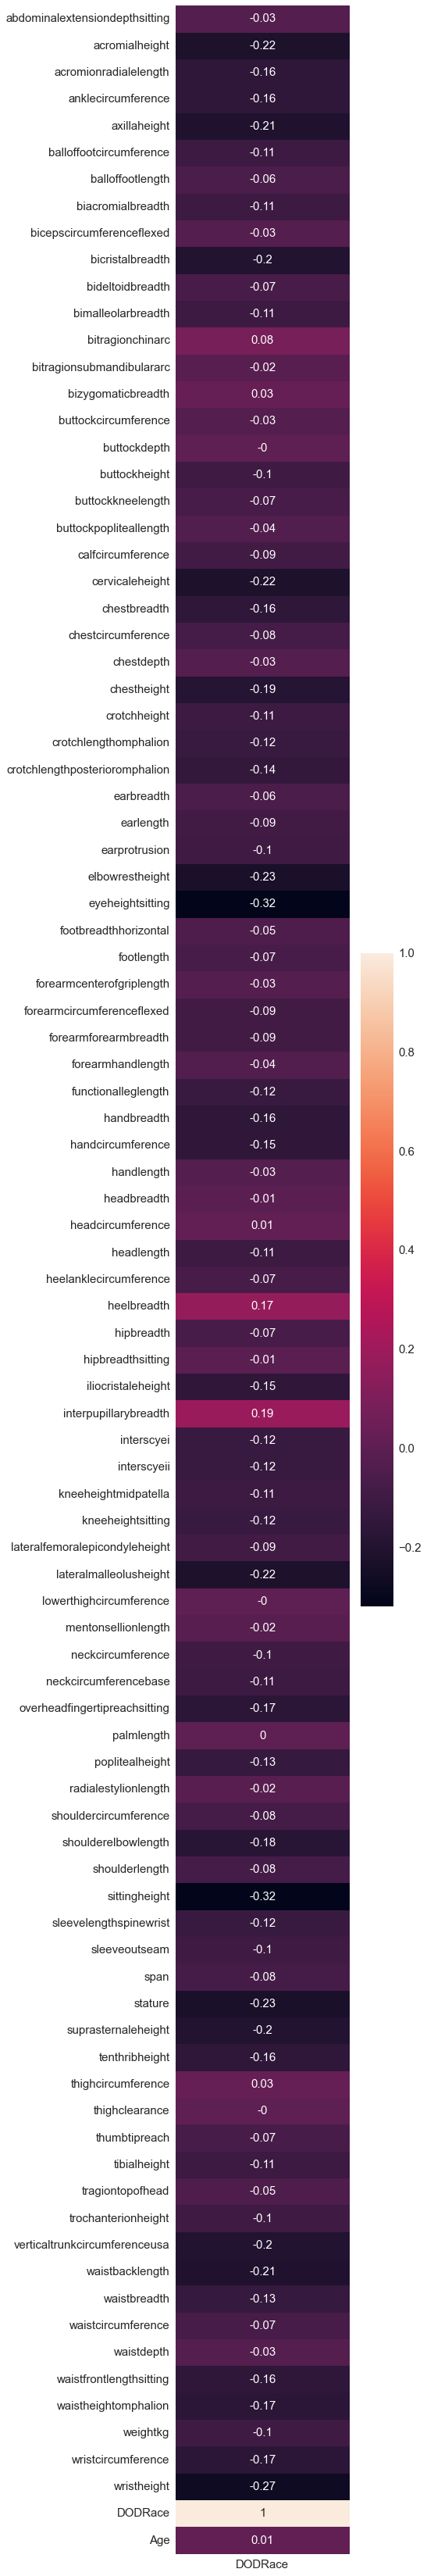

In [822]:
# The correlation of target feature with others
plt.figure(figsize=(5,60))
corr = df.corr()[['DODRace']]
sns.heatmap(corr.round(2), annot=True);

In [823]:
df_numeric = df.select_dtypes('number')
df_object = df.select_dtypes('O')

df_numeric.shape, df_object.shape

((5769, 95), (5769, 3))

In [824]:
# #histplot için:
# fig = df_numeric.hist(
# figsize=(16, 50), layout=(int(np.ceil(len(df_numeric.columns)/4)), 4),
# bins=50, color="darkcyan", 
# edgecolor="black", 
# xlabelsize=14, ylabelsize=14, 
# alpha=0.5, xrot=45
# )
# plt.tight_layout()
# plt.show()

In [825]:
# fig = plt.figure(figsize=(15, 30))
# plt.subplots_adjust(
#     left=0.1, right=0.9,
#     top=1.9, bottom=0.1,
#     wspace=0.4, hspace=0.15
# )
# for i, col in enumerate(df_numeric.columns):
#     plt.subplot(int(np.ceil(len(df_numeric.columns)/5)), 5, i+1)
#     sns.boxplot(y=col, data=df_numeric);

In [826]:
# fig = plt.figure(figsize=(15,50))
# plt.subplots_adjust(
#     left=0.1, right=0.9,
#     top=1.9, bottom=0.1,
#     wspace=0.4, hspace=0.2
# )
# for i, col in enumerate(df_numeric.columns):
#     plt.subplot(int(np.ceil(len(df_numeric.columns)/5)), 5, i+1)
#     sns.regplot(x=col, y="DODRace", data=df_numeric, scatter_kws={"s": 18});

In [827]:
# fig, axes = plt.subplots(int(np.ceil(len(df_object.columns)/3)), 3, figsize=(15, 12))

# for i, ax in enumerate(fig.axes):
#     # plot barplot of each feature skip target
#     if i < len(df_object.columns) - 1:
#         ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
#         g = sns.countplot(x=df_object.columns[i], alpha=0.7, data=df_object, ax=ax, palette = "Set1")
#         g.bar_label(g.containers[0])
# fig.tight_layout();

In [828]:
# df_object= df.select_dtypes(include="O")
# fig, axes = plt.subplots(1, 3, figsize=(12, 5))
# for i, ax in enumerate(fig.axes):
#     # plot the variation of price in each feature skip target
#     if i < len(df_object.columns) - 1:
#         ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
#         sns.boxplot(x=df_object.columns[i], y=df["DODRace"], data=df_object, ax=ax, palette="Spectral_r")
# fig.tight_layout()

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [829]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic"
})

In [830]:
df.shape

(5769, 98)

In [831]:
 df.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

> The data appears to be unbalanced. So in train-test split process, we will use "stratify" parameter. 

In [841]:
X = df.drop("DODRace",axis=1)
y = df.DODRace

In [842]:
cat = X.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

## Train-Test Split 

In [843]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [835]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [844]:
y_test.value_counts()

White       758
Black       260
Hispanic    136
Name: DODRace, dtype: int64

## OneHotEncoder for X_train and X_test

In [836]:
# First way
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler 
# Since there are dummy features, it is more convenient to use minmax scaler.

cat = X_train.select_dtypes("object").columns.to_list()

column_trans = make_column_transformer(
        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
        remainder=MinMaxScaler()
    )

In [837]:
# Second way
from sklearn.preprocessing import OneHotEncoder

def trans_OneHotEncoder(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns.to_list()    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(
        enc.fit_transform(X_train[cat]), index = X_train.index, 
        columns = enc.get_feature_names_out(cat)
    )    
    X_test_cat  = pd.DataFrame(
        enc.transform(X_test[cat]), index = X_test.index, 
        columns = enc.get_feature_names_out(cat)
    )    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
        
    return X_train, X_test

In [838]:
# X_train_enc, X_test_enc = trans_OneHotEncoder(X_train, X_test)

In [839]:
# X_train.shape, X_test.shape

In [840]:
# X_train_enc.shape, X_test_enc.shape

In [606]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)

# pd.DataFrame(y_test).value_counts().sort_index()

# Modelling

 **Modelling**
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## Import Libraries

In [607]:
# sklearn library for data preprocessing, machine learning algorithms, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
# from xgboost import XGBClassifier

# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score
import pickle

In [608]:
# yellowbrick library for visualizing the model performance
from yellowbrick.cluster import KElbowVisualizer 

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

## Defining Function for Prediction and Evaluation

In [609]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test, model_name='', average=None, labels=None):
    """ average (None, 'micro', 'macro', 'samples', 'weighted', 'binary')"""
    
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print("TEST REPORT")
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    plot_confusion_matrix(model, X_test, y_test);
    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    plot_confusion_matrix(model, X_train, y_train);
    
    return pd.DataFrame.from_dict({
        'accuracy_test' :accuracy_score(y_test, y_test_pred),
        'f1_test'       :f1_score(y_test, y_test_pred, average=average, labels=labels)[0],
        'recall_test'   :recall_score(y_test, y_test_pred, average=average, labels=labels)[0],
        'precision_test':precision_score(y_test, y_test_pred, average=average, labels=labels)[0],        
        'accuracy_train' :accuracy_score(y_train, y_train_pred),
        'f1_train'       :f1_score(y_train, y_train_pred, average=average, labels=labels)[0],        
        'recall_train'   :recall_score(y_train, y_train_pred, average=average, labels=labels)[0],
        'precision_train':precision_score(y_train, y_train_pred, average=average, labels=labels)[0],
    }, orient='index', columns=[model_name]).T

In [610]:
# def eval_metric(model, X_train, y_train, X_test, y_test):
#     y_train_pred = model.predict(X_train)
#     y_pred = model.predict(X_test)
    
#     print("Test_Set")
#     print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))
#     print()
#     print("Train_Set")
#     print(confusion_matrix(y_train, y_train_pred))
#     print(classification_report(y_train, y_train_pred))

## Implement Logistic Regression Model (Parametric)
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

### Vanilla Logistic Model

In [611]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline

log_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42) 

# pipeline for Logistic Regression
process = [("OHE_MinMax", column_trans), ("log_model", log_model)]
pipe_log_model = Pipeline(steps=process)

In [612]:
pipe_log_model.fit(X_train, y_train)

Pipeline(steps=[('OHE_MinMax',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('log_model',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

TEST REPORT
[[237  14   9]
 [  6 107  23]
 [ 12  93 653]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[ 973   34   31]
 [  21  454   68]
 [  64  357 2613]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
pipe_log_model,0.8640,0.6114,0.7868,0.5000,0.8754,0.6542,0.8361,0.5373


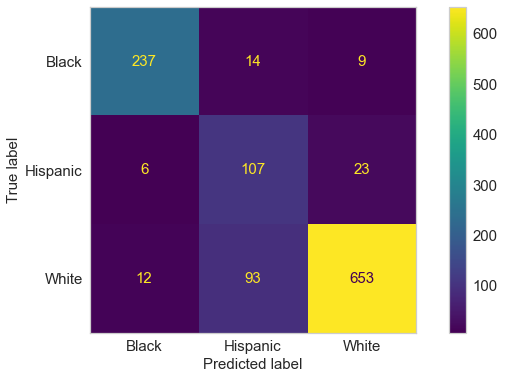

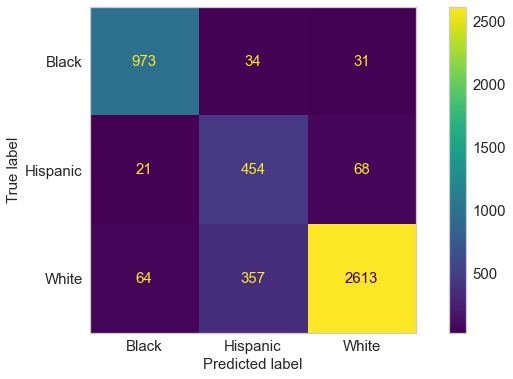

In [613]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test, 'pipe_log_model',labels=["Hispanic"])

### Scoring for target class

In [614]:
np.unique(y_train), np.unique(y_test)

(array(['Black', 'Hispanic', 'White'], dtype=object),
 array(['Black', 'Hispanic', 'White'], dtype=object))

Since target class is "Hispanic", we will use recall as an evaluation metric (Recall = # True positives / # positives = TP / (TP+FN))

In [618]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

### Cross Validate Model
- Use the cross_val_score function to evaluate the model using the train set.

In [621]:
# Only test scores for class Hispanic
process = [("OHE_MinMax", column_trans), ("log_model", log_model)]
model = Pipeline(steps=process)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.6102
test_precision_Hispanic   0.5031
test_recall_Hispanic      0.7792
dtype: float64

In [622]:
# the results for the weighted scores
model = Pipeline(steps=process)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.8563
test_precision_weighted   0.8865
test_recall_weighted      0.8563
test_f1_weighted          0.8658
dtype: float64

### Logistic Model GridsearchCV

> While using more than one score in cross validation, we use a score in gridsearch to increase class Hispanic's recall score.

In [623]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [471]:
model = Pipeline(process) 
# model.get_params()

In [624]:
penalty = ["l1", "l2", "elasticnet"]
C = np.logspace(-1, 5, 10)
class_weight = ['balanced', None]
param_grid = {"log_model__penalty" : penalty,
             "log_model__C" : C,
             "log_model__class_weight" : class_weight}

grid_log_model = GridSearchCV(model, param_grid = param_grid, scoring=recall_Hispanic, cv=5, n_jobs=-1) 

In [625]:
grid_log_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OHE_MinMax',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('log_model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                            

In [626]:
grid_log_model.best_params_

{'log_model__C': 0.46415888336127786,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l2'}

In [627]:
grid_log_model.best_score_  # recall_score for Hispanic

0.7751274209989807

In [628]:
# grid_model.estimator.get_params().keys()

In [629]:
%%time
grid_log_model.fit(X_train, y_train)

Wall time: 4min 35s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OHE_MinMax',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('log_model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                            

TEST REPORT
[[237  16   7]
 [  6 110  20]
 [ 13  94 651]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.81      0.62       136
       White       0.96      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.80      0.86      0.81      1154
weighted avg       0.90      0.86      0.88      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[ 962   39   37]
 [  24  450   69]
 [  72  378 2584]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.52      0.83      0.64       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic Regression,0.8648,0.6180,0.8088,0.5000,0.8659,0.6383,0.8287,0.5190


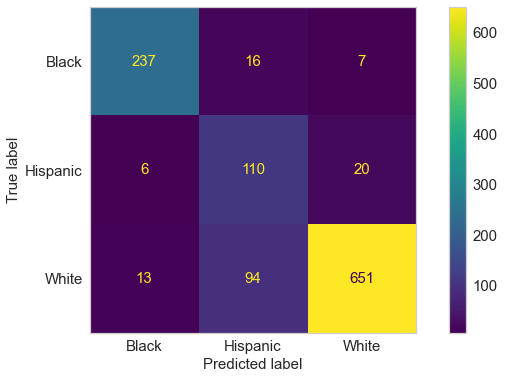

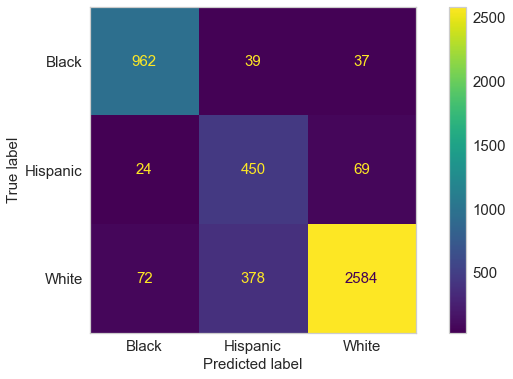

In [630]:
out_score_log = eval_metric(
    grid_log_model, X_train, y_train, X_test, y_test,
    'Logistic Regression', average=None, labels=["Hispanic"]
)
out_score_log

### Evaluating Precision-Recall Curve

> **What Are Precision-Recall Curves?** <br> There are many ways to evaluate the skill of a prediction model.<br> * Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.- <br> * Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity.<br>
**Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes.**

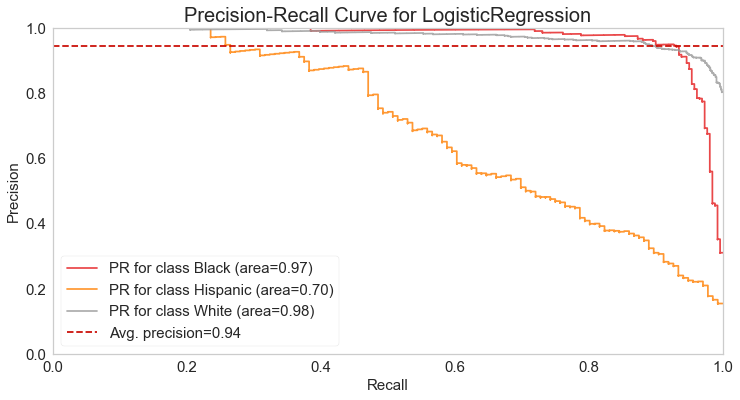

In [640]:
# precision-recall curve for log_pipe model

from yellowbrick.classifier import PrecisionRecallCurve

model = pipe_log_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [641]:
viz.score_

{'Black': 0.9724126416144254,
 'Hispanic': 0.7034982335837713,
 'White': 0.9759446120206474,
 'micro': 0.9423149431389914}

In [ ]:
y_pred = grid_log_model.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
print(log_AP,log_f1,log_recall)

In [646]:
# # precision-recall curve for grid model

# from yellowbrick.classifier import PrecisionRecallCurve

# model = grid_log_model

# viz = PrecisionRecallCurve(
#     model,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train, y_train)
# viz.score(X_test, y_test)
# viz.show();

## Implement Support Vector Machine Model (Distance Based Modelling)
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

### Vanilla SVC model 

In [661]:
svc_model = SVC(probability=True, class_weight="balanced", random_state=42)
process_svc = [("OHE_MinMax", column_trans), ("svc_model", svc_model)]
pipe_svc_model = Pipeline(steps=process_svc)

In [662]:
pipe_svc_model.fit(X_train, y_train)

Pipeline(steps=[('OHE_MinMax',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('svc_model',
                 SVC(class_weight='balanced', probability=True,
                     random_state=42))])

TEST REPORT
[[233  18   9]
 [  6 106  24]
 [  9 105 644]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.46      0.78      0.58       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[ 958   37   43]
 [  21  451   71]
 [  58  424 2552]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.83      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
pipe_svc_model,0.8518,0.9173,0.8962,0.9395,0.8583,0.9234,0.9229,0.9238


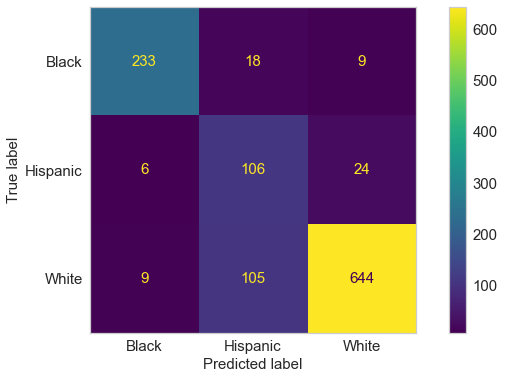

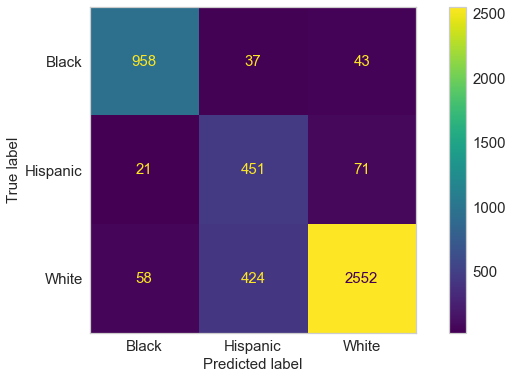

In [665]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test,"pipe_svc_model")

### Cross Validate Model

In [666]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [667]:
# Only test scores for class Hispanic
model = Pipeline(steps=process)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.5756
test_precision_Hispanic   0.4598
test_recall_Hispanic      0.7715
dtype: float64

In [668]:
model = Pipeline(process_svc)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy             0.8390
test_precision_weighted   0.8780
test_recall_weighted      0.8390
test_f1_weighted          0.8514
dtype: float64

###  SVC Model GridsearchCV

In [676]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [679]:
svc_model = SVC(class_weight="balanced", random_state=42)
process_svc = [("OHE_MinMax", column_trans), ("svc_model", svc_model)]

model = Pipeline(steps=process_svc)

param_grid = {
        'svc_model__C': [0.01, 0.1,1,2],
        'svc_model__gamma': ["scale", "auto"],
        'svc_model__kernel': ['poly', 'rbf'],
        "svc_model__degree" : [1, 2, 3]
}

grid_SVC_model = GridSearchCV(model, param_grid = param_grid, scoring=recall_Hispanic, cv=5, n_jobs=-1)

In [680]:
grid_SVC_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OHE_MinMax',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('svc_model',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc_model__C': [0.0

In [681]:
grid_SVC_model.best_params_

{'svc_model__C': 2,
 'svc_model__degree': 3,
 'svc_model__gamma': 'auto',
 'svc_model__kernel': 'poly'}

TEST REPORT
[[ 46 202  12]
 [  6 125   5]
 [114 564  80]]
              precision    recall  f1-score   support

       Black       0.28      0.18      0.22       260
    Hispanic       0.14      0.92      0.24       136
       White       0.82      0.11      0.19       758

    accuracy                           0.22      1154
   macro avg       0.41      0.40      0.22      1154
weighted avg       0.62      0.22      0.20      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[ 194  797   47]
 [  38  475   30]
 [ 538 2163  333]]
              precision    recall  f1-score   support

       Black       0.25      0.19      0.21      1038
    Hispanic       0.14      0.87      0.24       543
       White       0.81      0.11      0.19      3034

    accuracy                           0.22      4615
   macro avg       0.40      0.39      0.22      4615
weighted avg       0.61      0.22      0.20      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
SVC,0.2175,0.2434,0.9191,0.1403,0.2171,0.2388,0.8748,0.1383


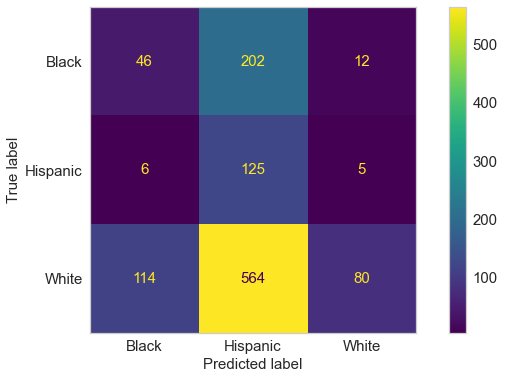

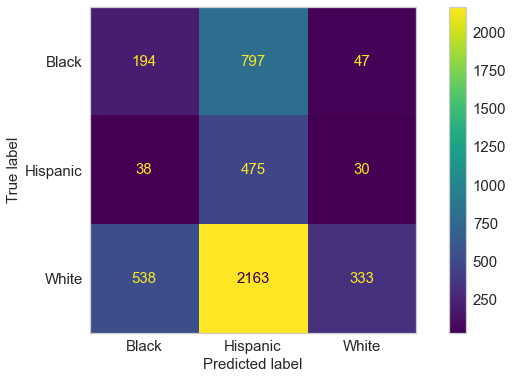

In [683]:
out_score_svc = eval_metric(
    grid_SVC_model, X_train, y_train, X_test, y_test,
    'SVC', average=None, labels=["Hispanic"]
)
out_score_svc

### Evaluating Precision-Recall Curve

In [687]:
# # precision-recall curve for grid_SVC_model

# from yellowbrick.classifier import PrecisionRecallCurve

# model = grid_SVC_model

# viz = PrecisionRecallCurve(
#     model,
#     per_class=True,
#     cmap="Set1",
#     classes= ["Black", "Hispanic", "White"]
# )
# viz.fit(X_train, y_train)
# viz.score(X_test, y_test)
# viz.show();

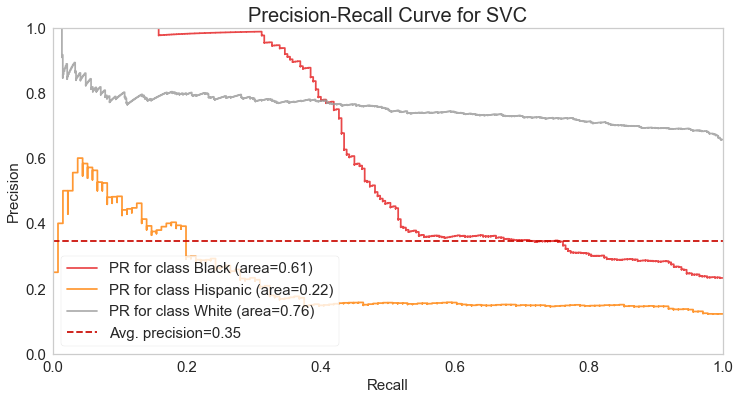

In [691]:
# precision-recall curve for pipe_svc_model

from yellowbrick.classifier import PrecisionRecallCurve

process_svc = [("OHE_MinMax", column_trans), ("svc_model", SVC(C=2,class_weight="balanced", degree=3, kernel="poly",
                                                               gamma = "auto",random_state=42))]

model = Pipeline(steps=process_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

The best parameter for the kernel turned out to be a third-order polynomial, but when these parameters are used, the result is an imbalance in the precision-recall curve. Here we have to get a more balanced score by changing the values of the hyperparameters.

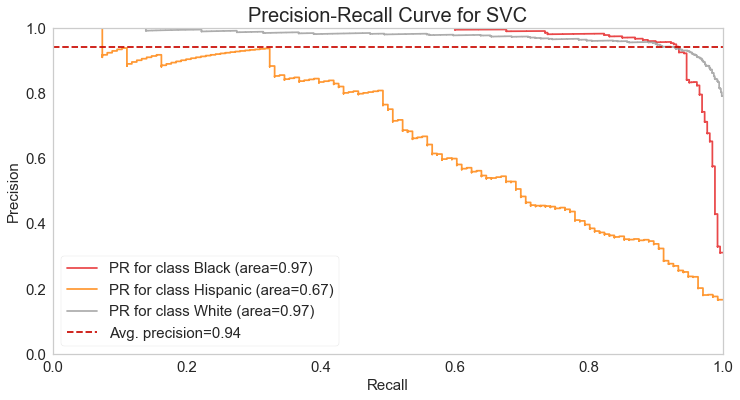

In [693]:
# precision-recall curve for pipe_svc_model

from yellowbrick.classifier import PrecisionRecallCurve

process_svc = [("OHE_MinMax", column_trans), ("svc_model", SVC(C=2,class_weight="balanced",random_state=42))]

model = Pipeline(steps=process_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## Tree Based Modellings
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

> make_column_transformer:This is a shorthand for the ColumnTransformer constructor; it does not require, and does not permit, naming the transformers. Instead, they will be given names automatically based on their types. It also does not allow weighting with transformer_weights.

> *Distance based algorithm need scaling, There is no need of scaling in tree based algorithms*

> Ordinal encoder is used for categorical features in tree based models. The reason is to create a model that performs better and faster without increasing the number of features.

**class sklearn.preprocessing.OrdinalEncoder(*, categories='auto', dtype=<class 'numpy.float64'>, handle_unknown='error', unknown_value=None, encoded_missing_value=nan)**
- handle_unknown{‘error’, ‘use_encoded_value’}, default=’error’
When set to ‘error’ an error will be raised in case an unknown categorical feature is present during transform. When set to ‘use_encoded_value’, the encoded value of unknown categories will be set to the value given for the parameter unknown_value. In inverse_transform, an unknown category will be denoted as None.
- unknown_valueint or np.nan, default=None
When the parameter handle_unknown is set to ‘use_encoded_value’, this parameter is required and will set the encoded value of unknown categories. It has to be distinct from the values used to encode any of the categories in fit. If set to np.nan, the dtype parameter must be a float dtype.

In [717]:
df.shape

(5769, 98)

In [718]:
X = df.drop(columns=['DODRace'])
y = df['DODRace']

In [719]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [720]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((4615, 97), (1154, 97), (1154,), (4615,))

### Ordinal Encoding Before Tree Based Models

In [721]:
# Get categorical columns name to use in ordinal encoding step

cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [722]:
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

### Implement Decision Tree Classifier Model

In [723]:
X_train.shape, X_test.shape

((4615, 97), (1154, 97))

In [726]:
pd.DataFrame(y_test).value_counts().sort_index()

DODRace 
Black       260
Hispanic    136
White       758
dtype: int64

In [724]:
# Built pipeline contains ordinal encoder and DT model

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


process_dt = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(class_weight="balanced",random_state=42))]

pipe_DT_model = Pipeline(steps=process_dt)

pipe_DT_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

TEST REPORT
[[163  17  80]
 [ 13  40  83]
 [ 61  90 607]]
              precision    recall  f1-score   support

       Black       0.69      0.63      0.66       260
    Hispanic       0.27      0.29      0.28       136
       White       0.79      0.80      0.79       758

    accuracy                           0.70      1154
   macro avg       0.58      0.57      0.58      1154
weighted avg       0.70      0.70      0.70      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
pipe_DT_model,0.7019,0.6559,0.6269,0.6878,1.0000,1.0000,1.0000,1.0000


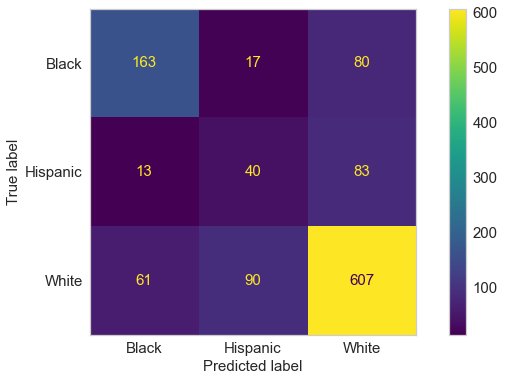

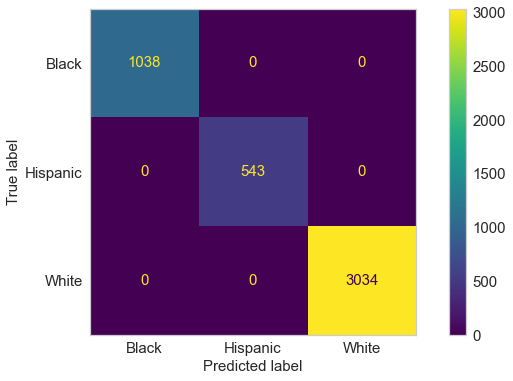

In [725]:
eval_metric(pipe_DT_model, X_train, y_train, X_test, y_test,"pipe_DT_model")

#### DT Model Cross Validation

In [727]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [728]:
# Only test scores for class Hispanic
model = Pipeline(steps=process_dt)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.2468
test_precision_Hispanic   0.2358
test_recall_Hispanic      0.2614
dtype: float64

In [729]:
model = Pipeline(process_dt)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy             0.6719
test_precision_weighted   0.6764
test_recall_weighted      0.6719
test_f1_weighted          0.6735
dtype: float64

#### DT Model GridSearch

In [731]:
process_dt = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(class_weight="balanced",random_state=42))]
model = Pipeline(steps=process_dt)

# model.get_params()

In [732]:
# define the hyperparameters to be used in grid search
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", .2, .6],
              "DT_model__max_depth": [None, 2, 3, 5],
              "DT_model__min_samples_leaf": [1, 3, 5, 6, 7],
              "DT_model__min_samples_split": [2, 5, 7]}
grid_DT_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring=recall_Hispanic,
                          cv=5,
                          n_jobs = -1)

In [733]:
grid_DT_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 2, 3, 5],
                         'DT_model__max_feature

In [735]:
grid_DT_model.best_score_  # recall score of class Hispanic

0.7971287801563031

In [736]:
grid_DT_model.best_params_  # tunned hyperparameters

{'DT_model__max_depth': 2,
 'DT_model__max_features': 0.2,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 2,
 'DT_model__splitter': 'random'}

In [737]:
grid_DT_model.best_estimator_ 
# Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.  

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                                        max_features=0.2, random_state=42,
                                        splitter='random'))])

TEST REPORT
[[106 107  47]
 [ 11 115  10]
 [ 64 501 193]]
              precision    recall  f1-score   support

       Black       0.59      0.41      0.48       260
    Hispanic       0.16      0.85      0.27       136
       White       0.77      0.25      0.38       758

    accuracy                           0.36      1154
   macro avg       0.51      0.50      0.38      1154
weighted avg       0.66      0.36      0.39      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[ 378  463  197]
 [  53  445   45]
 [ 276 1913  845]]
              precision    recall  f1-score   support

       Black       0.53      0.36      0.43      1038
    Hispanic       0.16      0.82      0.26       543
       White       0.78      0.28      0.41      3034

    accuracy                           0.36      4615
   macro avg       0.49      0.49      0.37      4615
weighted avg       0.65      0.36      0.40      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Decision Tree,0.3588,0.2678,0.8456,0.1591,0.3614,0.2646,0.8195,0.1577


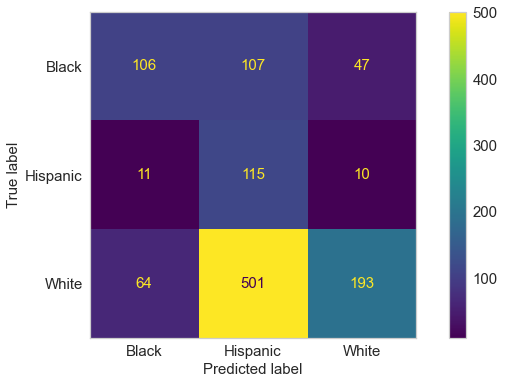

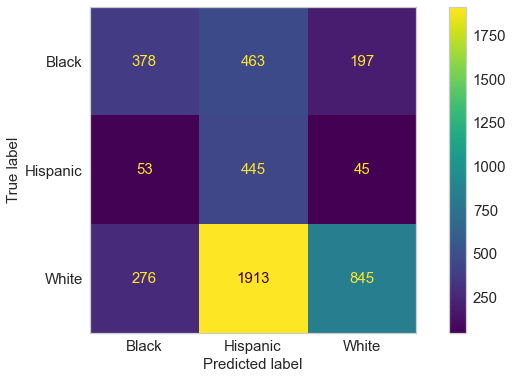

In [740]:
out_score_dt = eval_metric(
    grid_DT_model, X_train, y_train, X_test, y_test, 
    'Decision Tree', average=None, labels=["Hispanic"]
)
out_score_dt

#### Evaluating Precision-Recall Curve

In [768]:
# # precision-recall curve for grid_SVC_model

# from yellowbrick.classifier import PrecisionRecallCurve

# model = grid_DT_model

# viz = PrecisionRecallCurve(
#     model,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train, y_train)
# viz.score(X_test, y_test)
# viz.show();

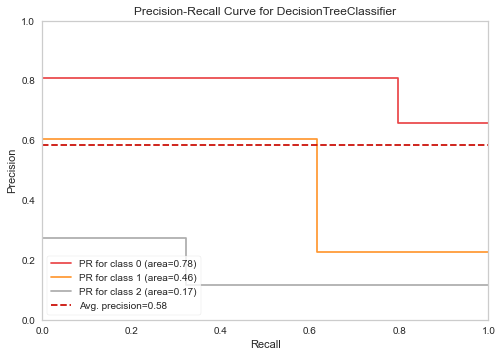

In [132]:
# precision-recall curve for pipe_svc_model

from yellowbrick.classifier import PrecisionRecallCurve

model = pipe_DT_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
# precision-recall curve for pipe_svc_model

from yellowbrick.classifier import PrecisionRecallCurve

process_dt = [("OrdinalEncoder", column_trans), ("DT_model", 
                                                 DecisionTreeClassifier(
                                                     max_depth=2,max_features= 0.2,splitter= 'random',
                                                     min_samples_leaf = 1,min_samples_split= 2
                                                     class_weight="balanced",random_state=42))]

model = Pipeline(steps=process_dt)

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

### Implement RF Classifier Model
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

#### Vanilla RF Model

In [749]:
process_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced",random_state=42))]

pipe_RF_model = Pipeline(steps=process_rf)

pipe_RF_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

TEST REPORT
[[181   1  78]
 [  7   2 127]
 [  8   0 750]]
              precision    recall  f1-score   support

       Black       0.92      0.70      0.79       260
    Hispanic       0.67      0.01      0.03       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.79      0.57      0.57      1154
weighted avg       0.80      0.81      0.76      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Random Forest,0.8085,0.0288,0.0147,0.6667,1.0000,1.0000,1.0000,1.0000


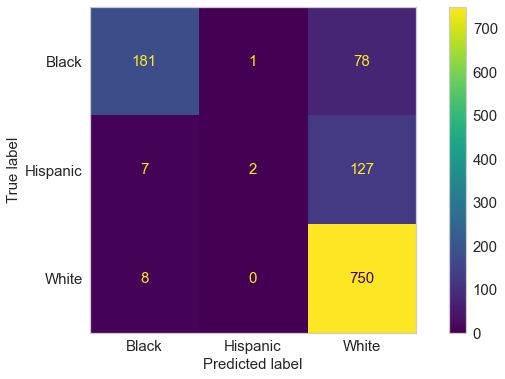

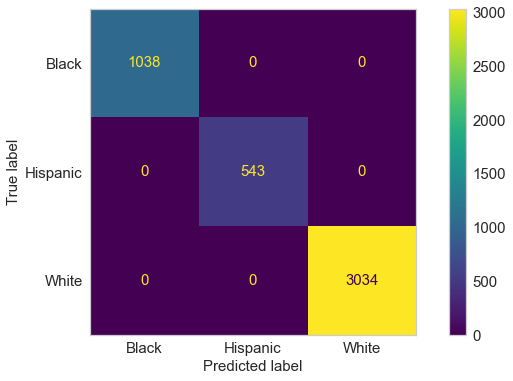

In [750]:
eval_metric(
    pipe_RF_model, X_train, y_train, X_test, y_test, 
    'Random Forest', average=None, labels=["Hispanic"]
)

#### RF Model Cross validation

In [751]:
process_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=42))]

model = Pipeline(steps=process_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.0695
test_precision_Hispanic   0.6900
test_recall_Hispanic      0.0369
dtype: float64

In [752]:
model = Pipeline(process_rf)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.8080
test_precision_weighted   0.7984
test_recall_weighted      0.8080
test_f1_weighted          0.7608
dtype: float64

#### RF Model GridsearchCV

In [754]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced",random_state=42))]
model = Pipeline(steps=operations)

param_grid = {"RF_model__n_estimators":[5,10],
             "RF_model__criterion":["entropy","gini"],
              "RF_model__max_features":['auto',"log2", 10, 20],
              "RF_model__max_depth": [2,3],
#              "RF_model__min_samples_split": [2, 5, 10],
#              "RF_model__min_samples_leaf" : [1, 5]
             }

grid_RF_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring=recall_Hispanic,
                          cv=5,
                          n_jobs = -1)

In [757]:
grid_RF_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['entropy', 'gini'],
                         'RF_model__max_dep

In [758]:
grid_RF_model.best_score_

0.6481991165477405

In [759]:
grid_RF_model.best_params_

{'RF_model__criterion': 'entropy',
 'RF_model__max_depth': 2,
 'RF_model__max_features': 'auto',
 'RF_model__n_estimators': 10}

In [760]:
grid_RF_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=2,
                                        n_estimators=10, random_state=42))])

TEST REPORT
[[167  66  27]
 [ 22  85  29]
 [ 99 333 326]]
              precision    recall  f1-score   support

       Black       0.58      0.64      0.61       260
    Hispanic       0.18      0.62      0.27       136
       White       0.85      0.43      0.57       758

    accuracy                           0.50      1154
   macro avg       0.54      0.57      0.49      1154
weighted avg       0.71      0.50      0.55      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[ 626  266  146]
 [  65  360  118]
 [ 379 1223 1432]]
              precision    recall  f1-score   support

       Black       0.59      0.60      0.59      1038
    Hispanic       0.19      0.66      0.30       543
       White       0.84      0.47      0.61      3034

    accuracy                           0.52      4615
   macro avg       0.54      0.58      0.50      4615
weighted avg       0.71      0.52      0.57      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Random Forest,0.5009,0.2742,0.6250,0.1756,0.5239,0.3010,0.6630,0.1947


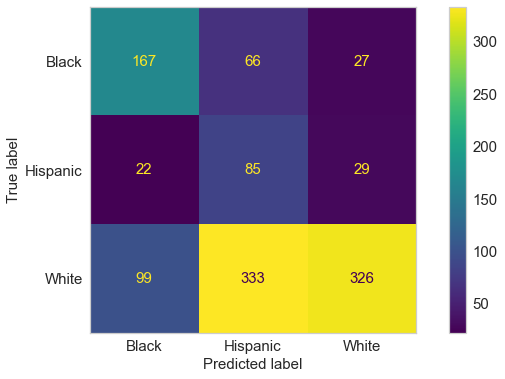

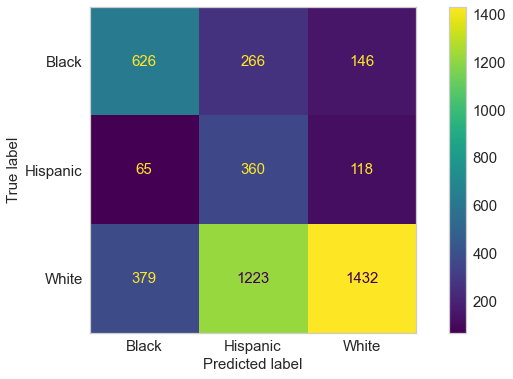

In [762]:
out_score_rfc = eval_metric(
    grid_RF_model, X_train, y_train, X_test, y_test, 
    'Random Forest', average=None, labels=["Hispanic"]
)
out_score_rfc

#### Evaluating Precision-Recall Curve

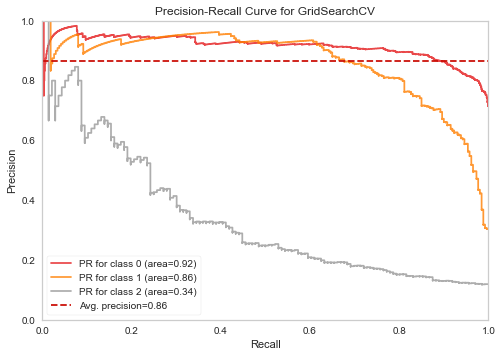

In [144]:
# # precision-recall curve for grid model

# from yellowbrick.classifier import PrecisionRecallCurve

# model = grid_RF_model

# viz = PrecisionRecallCurve(
#     model,
#     per_class=True,
#     cmap="Set1"
# )
# viz.fit(X_train, y_train)
# viz.score(X_test, y_test)
# viz.show();

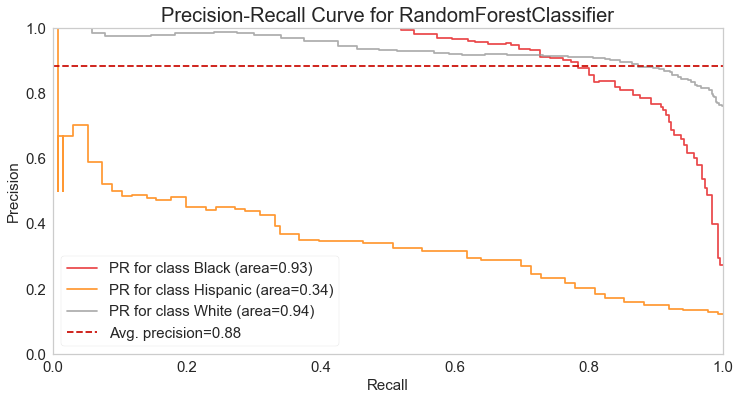

In [763]:
# precision-recall curve for log_pipe model

from yellowbrick.classifier import PrecisionRecallCurve

model = pipe_RF_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

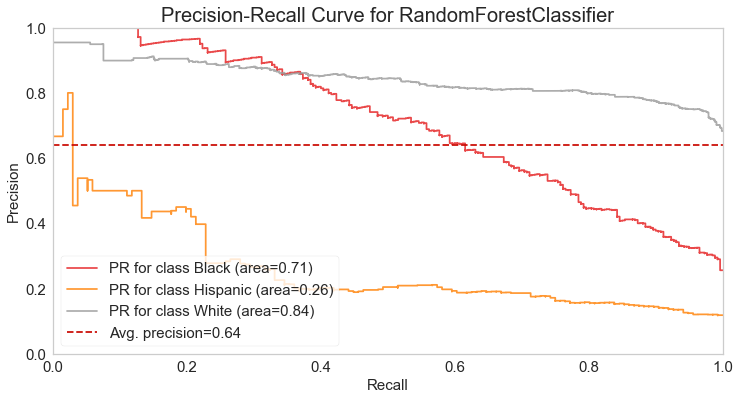

In [767]:
# precision-recall curve for pipe_svc_model

from yellowbrick.classifier import PrecisionRecallCurve

process_rf = [("OrdinalEncoder", column_trans), ("RF_model", 
                                                 RandomForestClassifier(criterion= 'entropy',max_depth= 2,
                                                 max_features = 'auto',n_estimators= 10,
                                                     class_weight="balanced",random_state=42))]

model = Pipeline(steps=process_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

###  Implement XGBoost Classifier Model
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [866]:
# way-1
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

cat = X_train.select_dtypes("object").columns.to_list()    
column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat), 
    remainder='passthrough'
)

In [867]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pd.DataFrame(y_test).value_counts().sort_index()

0    260
1    136
2    758
dtype: int64

#### Vanilla XGBoost Model

In [871]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=42))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               co...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max

In [872]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [875]:
np.unique(classes_weights)

array([0.50703142, 1.4820167 , 2.8330264 ])

In [877]:
comp = pd.DataFrame(classes_weights)

comp["label"] = pd.DataFrame(y_train).reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label  0     
0      1.4820    1038
1      2.8330     543
2      0.5070    3034
Name: 0, dtype: int64

In [878]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               co...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max

TEST REPORT
[[224   8  28]
 [  8  65  63]
 [ 14  17 727]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       260
           1       0.72      0.48      0.58       136
           2       0.89      0.96      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
XGBoost,0.8804,0.5752,0.4779,0.7222,1.0000,1.0000,1.0000,1.0000


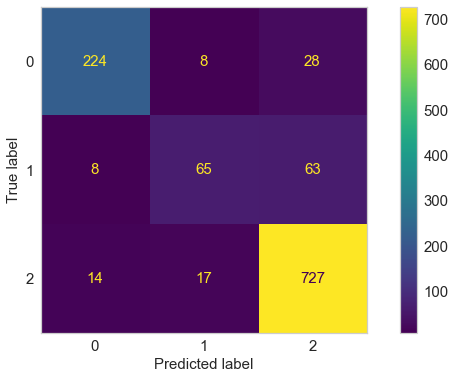

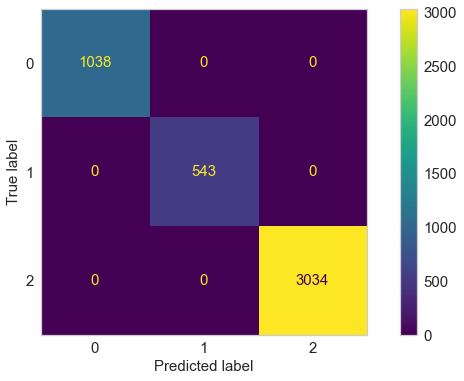

In [879]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test, 'XGBoost', average=None, labels=[1])

In [880]:
scoring_xgb = {
    "f1_Hispanic" : make_scorer(f1_score, average = None, labels=[1]),
    "recall_Hispanic" : make_scorer(recall_score, average = None, labels=[1]),
    "precision_Hispanic" : make_scorer(precision_score, average = None, labels=[1])}

In [881]:
recall_Hispanic_xgb = make_scorer(recall_score, average = None, labels=[1])

#### Cross Validate Model

In [884]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=42))]
model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, 
    error_score="raise",
    n_jobs=-1,
    cv=5,
    fit_params={"XGB_model__sample_weight":classes_weights}
)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.5256
test_recall_Hispanic      0.4235
test_precision_Hispanic   0.6940
dtype: float64

In [885]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=42))]
model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model, X_train, y_train, 
    scoring = ['accuracy', 'precision_weighted','recall_weighted','f1_weighted'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
    fit_params={"XGB_model__sample_weight":classes_weights}
)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy             0.8696
test_precision_weighted   0.8611
test_recall_weighted      0.8696
test_f1_weighted          0.8605
dtype: float64

#### XGBoost Model GridsearchCV

In [894]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(random_state=42)

# pipeline for GridsearchCV
model = Pipeline([
    ("OrdinalEncoder", column_trans), 
    ("xgb", xgb_model)
]) 
param_grid = {
    'xgb__n_estimators':[50,100],
    'xgb__learning_rate': [0.1, 0.3],
    'xgb__max_depth':[1,2],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1],
    'xgb__min_child_weight' : [8],
#     'xgb__min_split_loss': [0.8],
#     'xgb__reg_lambda' : [1],
#     'xgb__grow_policy': ['depthwise'],
#     'xgb__eval_metric' : ["merror"],
}
recall_Hispanic_xgb = make_scorer(recall_score, average = None, labels=[1])
grid_xgb_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    verbose=1,
    scoring=recall_Hispanic_xgb,
    refit=True,
    n_jobs=-1
)

In [895]:
%%time
grid_xgb_model.fit(
    X_train, y_train, 
    xgb__sample_weight=classes_weights
)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Wall time: 1min 40s


GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                  

In [896]:
# xgb_grid_model.get_params().keys()
grid_xgb_model.best_params_

{'xgb__colsample_bytree': 0.8,
 'xgb__learning_rate': 0.3,
 'xgb__max_depth': 1,
 'xgb__min_child_weight': 8,
 'xgb__n_estimators': 100,
 'xgb__subsample': 0.8}

TEST REPORT
[[223  23  14]
 [ 12  93  31]
 [ 34 164 560]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       260
           1       0.33      0.68      0.45       136
           2       0.93      0.74      0.82       758

    accuracy                           0.76      1154
   macro avg       0.70      0.76      0.70      1154
weighted avg       0.83      0.76      0.78      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[ 905   68   65]
 [  46  396  101]
 [ 148  542 2344]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1038
           1       0.39      0.73      0.51       543
           2       0.93      0.77      0.85      3034

    accuracy                           0.79      4615
   macro avg       0.72      0.79      0.73      4615
weighted avg       0.85      0.79      0.81      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
XGBoost,0.7591,0.4471,0.6838,0.3321,0.7898,0.5113,0.7293,0.3936


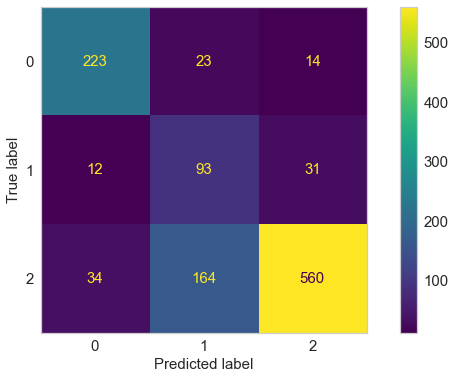

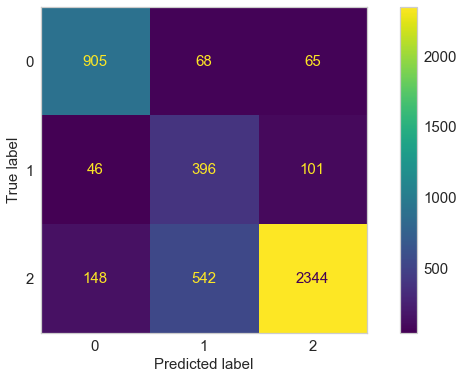

In [897]:
out_score_xgb = eval_metric(grid_xgb_model, X_train, y_train, X_test, y_test, 'XGBoost', average=None, labels=[1])
out_score_xgb

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits


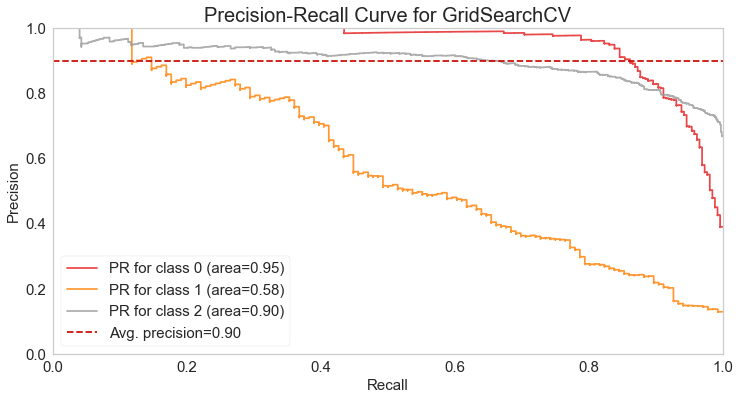

In [898]:
from yellowbrick.classifier import PrecisionRecallCurve
model = grid_xgb_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# Compare The Models

Let's examine the performance of the machine learning models we have implemented so far:

In [ ]:
out_score_log, out_score_svc, out_score_dt, out_score_rfc,out_score_xgb

In [899]:
compare = pd.concat([out_score_log, out_score_svc, out_score_dt, out_score_rfc,out_score_xgb])
compare

,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic Regression,0.8648,0.6180,0.8088,0.5000,0.8659,0.6383,0.8287,0.5190
SVC,0.2175,0.2434,0.9191,0.1403,0.2171,0.2388,0.8748,0.1383
Decision Tree,0.3588,0.2678,0.8456,0.1591,0.3614,0.2646,0.8195,0.1577
Random Forest,0.5009,0.2742,0.6250,0.1756,0.5239,0.3010,0.6630,0.1947
XGBoost,0.7591,0.4471,0.6838,0.3321,0.7898,0.5113,0.7293,0.3936


##  Accuracy Comparison

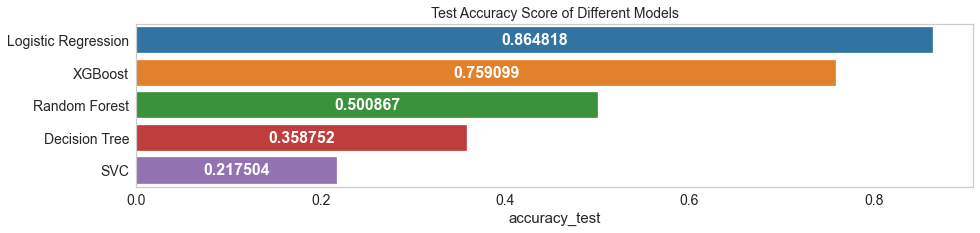

In [900]:
compare = compare.sort_values(by='accuracy_test', ascending=False)

plt.figure(figsize=(15,3))
ax = sns.barplot(x='accuracy_test', y=compare.index, data=compare, palette="tab10")
ax.bar_label(ax.containers[0], fontsize=16, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Accuracy Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

##  F1 Score Comparison

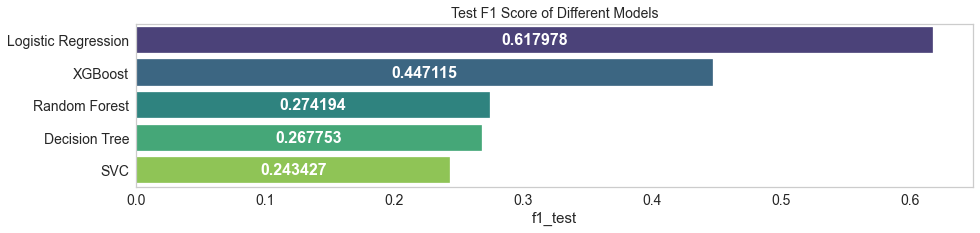

In [901]:
compare = compare.sort_values(by='f1_test', ascending=False)

plt.figure(figsize=(15,3))
ax = sns.barplot(x='f1_test', y=compare.index, data=compare, palette="viridis")
ax.bar_label(ax.containers[0], fontsize=16, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test F1 Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

##  Recall Score Comparison

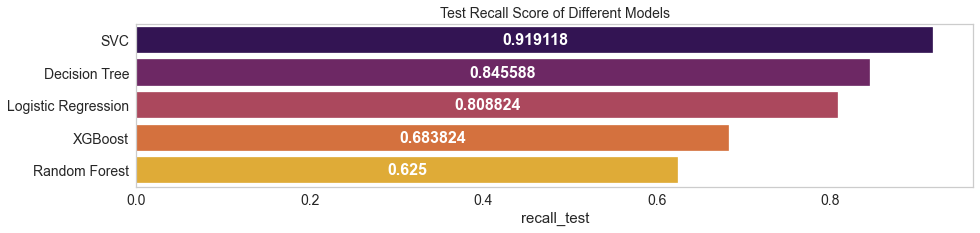

In [902]:
compare = compare.sort_values(by='recall_test', ascending=False)

plt.figure(figsize=(15,3))
ax = sns.barplot(x='recall_test', y=compare.index, data=compare, palette="inferno")
ax.bar_label(ax.containers[0], fontsize=16, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Recall Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

##  Precision Score Comparison

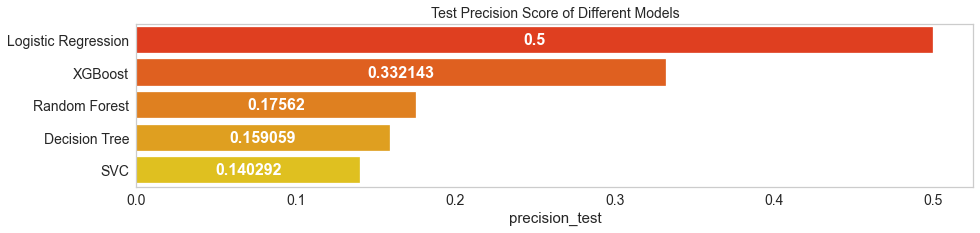

In [903]:
compare = compare.sort_values(by='precision_test', ascending=False)

plt.figure(figsize=(15,3))
ax = sns.barplot(x='precision_test', y=compare.index, data=compare, palette="autumn")
ax.bar_label(ax.containers[0], fontsize=16, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Precision Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

---
---

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

> When we evaluate it over the Recall score, we see that SVC gives the best result. However, let's remember that the other scores fall a lot over the values ​​I get as a result of grid search. Therefore, it is more appropriate to evaluate the scores obtained with the default values ​​of the logistic model among the models. Therefore, we will set up our final model according to the Logistic model.

In [923]:
# df["DODRace"] = df.DODRace.map({
#     2: "White",
#     0: "Black",
#     1: "Hispanic"
# })

In [939]:
X = df.drop("DODRace",axis=1)
y = df.DODRace
cat = X.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [940]:
X.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,21,Right hand


In [941]:
column_trans_final = make_column_transformer(( OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) , cat), 
                                             remainder='passthrough')

In [942]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

process_final = [("OrdinalEncoder", column_trans), ("DT_model", 
                                                 DecisionTreeClassifier(
                                                     max_depth=2,max_features= 0.2,splitter= 'random',
                                                     min_samples_leaf = 1,min_samples_split= 2,
                                                     class_weight="balanced",random_state=42))]

final_model = Pipeline(steps=process_final)

In [943]:
final_model.fit(X, y)

ValueError: Input contains NaN

In [910]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000,5769.0000
mean,247.2543,1408.6303,328.0716,225.2018,1301.9026,244.4080,195.1189,399.7060,341.6630,274.9034,491.4548,72.3354,324.9622,306.6778,139.5294,1022.0595,242.2344,872.1128,610.4500,498.3318,386.3165,1479.9522,283.2326,1024.2066,252.3226,1254.2902,827.1057,622.6937,351.8802,35.1754,62.6062,22.2272,240.5533,786.3992,98.9151,263.5124,339.4588,295.6616,553.0983,467.8988,1104.3472,85.0981,204.2156,189.5748,152.0437,570.4243,196.6408,333.2749,70.8341,348.9308,386.4179,1042.1524,632.5349,412.7740,433.0173,476.6653,541.3767,484.3167,69.7618,406.9431,119.6017,376.1276,414.5545,1390.5250,114.1066,417.2271,259.7577,1131.2144,354.8052,145.2023,898.5925,868.3611,578.0130,1766.9511,1716.9390,1405.3924,1101.6315,623.5836,176.6965,791.0445,459.3891,129.5803,884.6594,1632.4710,460.9903,318.4099,916.8171,230.4592,377.3521,1033.5911,800.9811,169.3084,831.3345,29.7764
std,37.4577,78.3031,20.4446,15.9658,71.2609,16.8036,13.3790,30.1241,41.2706,19.2396,42.0119,5.3270,17.0504,20.8188,7.2487,75.9530,26.4090,54.0648,33.1208,28.5126,30.5778,83.5907,20.6122,100.3758,26.6603,78.8824,54.0563,45.0872,29.8073,3.2211,4.8616,3.1490,28.5955,41.8432,6.6589,17.2316,23.0816,29.8573,62.2555,29.7857,67.7193,6.3209,15.4861,11.4225,6.1766,18.2454,8.3229,22.2607,5.9325,25.1914,32.2739,59.1021,36.6446,42.8685,38.5132,32.6438,33.7372,28.9772,7.2454,33.0986,7.8605,39.7243,38.0373,85.5190,7.1054,30.9543,19.6197,92.3507,22.3

In [911]:
mean_human = X.describe(include="all").loc["mean"] 
mean_human

abdominalextensiondepthsitting    247.2543
acromialheight                   1408.6303
acromionradialelength             328.0716
anklecircumference                225.2018
axillaheight                     1301.9026
balloffootcircumference           244.4080
balloffootlength                  195.1189
biacromialbreadth                 399.7060
bicepscircumferenceflexed         341.6630
bicristalbreadth                  274.9034
bideltoidbreadth                  491.4548
bimalleolarbreadth                 72.3354
bitragionchinarc                  324.9622
bitragionsubmandibulararc         306.6778
bizygomaticbreadth                139.5294
buttockcircumference             1022.0595
buttockdepth                      242.2344
buttockheight                     872.1128
buttockkneelength                 610.4500
buttockpopliteallength            498.3318
calfcircumference                 386.3165
cervicaleheight                  1479.9522
chestbreadth                      283.2326
chestcircum

In [912]:
mean_human["Gender"] = "Female"                           
mean_human["SubjectsBirthLocation"] = "California"
mean_human["WritingPreference"] = "Left hand"

In [913]:
pd.DataFrame(mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
mean,247.2543,1408.6303,328.0716,225.2018,1301.9026,244.4080,195.1189,399.7060,341.6630,274.9034,491.4548,72.3354,324.9622,306.6778,139.5294,1022.0595,242.2344,872.1128,610.4500,498.3318,386.3165,1479.9522,283.2326,1024.2066,252.3226,1254.2902,827.1057,622.6937,351.8802,35.1754,62.6062,22.2272,240.5533,786.3992,98.9151,263.5124,339.4588,295.6616,553.0983,467.8988,1104.3472,85.0981,204.2156,189.5748,152.0437,570.4243,196.6408,333.2749,70.8341,348.9308,386.4179,1042.1524,632.5349,412.7740,433.0173,476.6653,541.3767,484.3167,69.7618,406.9431,119.6017,376.1276,414.5545,1390.5250,114.1066,417.2271,259.7577,1131.2144,354.8052,145.2023,898.5925,868.3611,578.0130,1766.9511,1716.9390,1405.3924,1101.6315,623.5836,176.6965,791.0445,459.3891,129.5803,884.6594,1632.4710,460.9903,318.4099,916.8171,230.4592,377.3521,1033.5911,800.9811,169.3084,831.3345,Female,California,29.7764,Left hand
